## <center> Time Series Modeling

### Objectives
- Understand and build AR, MA, and ARIMA models
- Compare time series models
- Develop forecasts

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
np.random.seed = 47
warnings.filterwarnings('ignore')

## <center> Autoregressive Models (AR)

<center> Today = constant + slope×yesterday + noise

<center> 𝑌𝑡=𝜇+𝜙∗𝑌𝑡−1+𝜖𝑡

In [115]:
## AR
n = 12*10
mu = 8
phi = 0.7
noise_weight = 1
noise = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + noise[i] if i>1 else mu + phi + noise[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

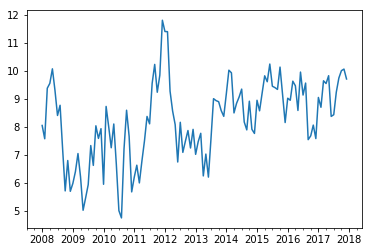

In [116]:
time_series.plot()

In [117]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
ar_model = ARMA(time_series, order=(1,0)).fit()
print(ar_model.summary())
print(ar_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                -159.131
Method:                       css-mle   S.D. of innovations              0.908
Date:                Wed, 15 Jan 2020   AIC                            324.263
Time:                        18:03:22   BIC                            332.625
Sample:                    01-31-2008   HQIC                           327.659
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2715      0.345     23.992      0.000       7.596       8.947
ar.L1.y        0.7658      0.058     13.259      0.000       0.653       0.879
                                    Roots           

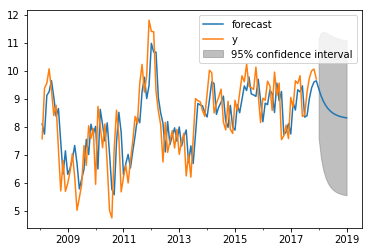

In [118]:
ar_model.plot_predict(1,n+12); plt.show()

## <center> Moving Average Models (MA)

<center> Today = Mean + Noise + Slope×yesterday's noise

<center> 𝑌𝑡=𝜇+𝜖𝑡+𝜃∗𝜖𝑡−1

In [119]:
## MA
n = 12*10
mu = 8
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + theta*errors[i-1] + errors[i] if i>1 else mu + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

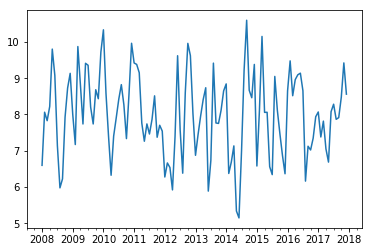

In [120]:
time_series.plot()

In [121]:
ma_model = ARMA(time_series, order=(0,1)).fit()
print(ma_model.summary())
print(ma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 1)   Log Likelihood                -157.110
Method:                       css-mle   S.D. of innovations              0.891
Date:                Wed, 15 Jan 2020   AIC                            320.220
Time:                        18:03:26   BIC                            328.583
Sample:                    01-31-2008   HQIC                           323.616
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9799      0.150     53.294      0.000       7.686       8.273
ma.L1.y        0.8470      0.049     17.422      0.000       0.752       0.942
                                    Roots           

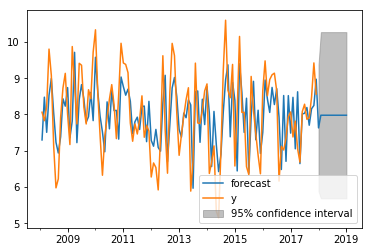

In [122]:
ma_model.plot_predict(1,n+12); plt.show()

## <center> ARMA

<center> Combines both AR and MA components into one model.

<center> 𝑌𝑡 = 𝜇 + 𝜙∗𝑌𝑡−1 + 𝜖𝑡 + 𝜃∗𝜖𝑡−1

In [123]:
## ARMA
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1]  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

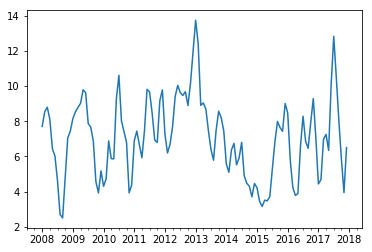

In [124]:
time_series.plot()

In [125]:
arma_model = ARMA(time_series, order=(1,1)).fit()
print(arma_model.summary())
print(arma_model.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(1, 1)   Log Likelihood                -172.442
Method:                       css-mle   S.D. of innovations              0.996
Date:                Wed, 15 Jan 2020   AIC                            352.884
Time:                        18:03:29   BIC                            364.034
Sample:                    01-31-2008   HQIC                           357.412
                         - 12-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0676      0.444     15.922      0.000       6.198       7.938
ar.L1.y        0.5986      0.073      8.238      0.000       0.456       0.741
ma.L1.y        0.9926      0.053     18.837      0.0

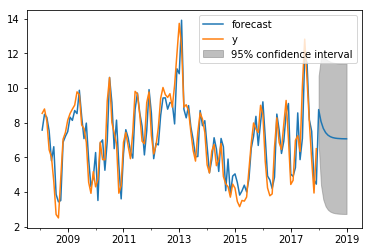

In [126]:
arma_model.plot_predict(1,n+12); plt.show()

## <center> ARIMA

<center> Combines AR and MA components as well as an <b> Integrated </b> component which accounts for trends.

<center>AR, MA, and ARMA models require stationarity. <br>
ARIMA models can handle non-stationary time series due to the <b>I</b> component.

In [127]:
## ARIMA
n = 12*10
mu = 8
phi = 0.7
theta = 0.9
noise_weight = 1
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu + phi*(data[i-1]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>1 else mu + phi + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

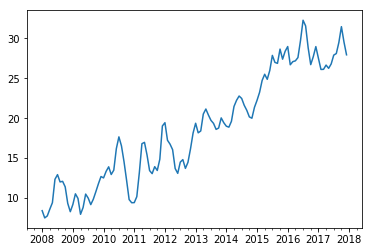

In [128]:
time_series.plot()

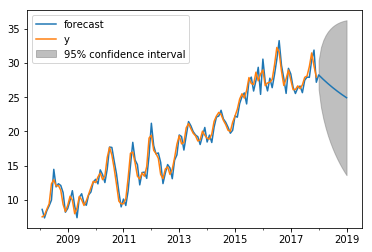

In [129]:
arma_model = ARMA(time_series, order=(1,1)).fit()
arma_model.plot_predict(1,n+12); plt.show()

In [130]:
from statsmodels.tsa.arima_model import ARIMA

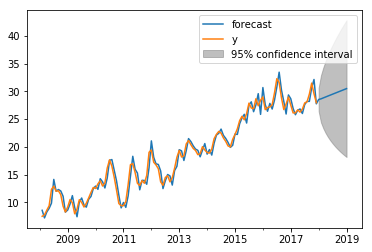

In [131]:
arima_model = ARIMA(time_series, order=(1,1,1)).fit()
arima_model.plot_predict(1,n+12); plt.show()

## <center> Determining the orders of ARIMA

<center> p = AR component <br>
d = I component (differencing)<br>
q = MA component

In [376]:
n = 12*10
mu = 8
phi = 0.15
phi_2 = 0.60
theta = 3.5
noise_weight = 0.25
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
for i,x in enumerate(values):
    data.append(mu  + phi*(data[i-1]-mu) + phi_2*(data[i-2]-mu) + errors[i-1]*theta + errors[i] + 0.05*i  if i>2 else mu + phi + phi_2 + errors[i])
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

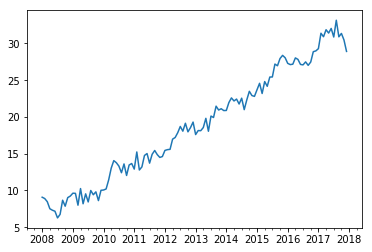

In [377]:
time_series.plot()

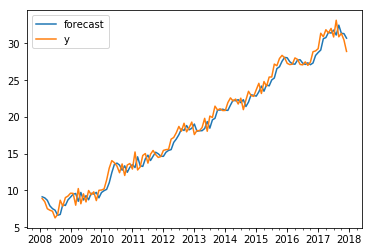

In [378]:
## fitting model on all but last year of data
arima_model = ARIMA(time_series, order=(1,0,1)).fit()
arima_model.plot_predict(1); plt.show()

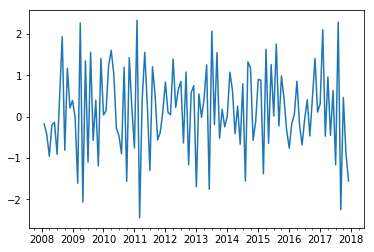

In [379]:
time_series.diff().plot()

AIC: 322.98885821270585
BIC: 334.10535218515196


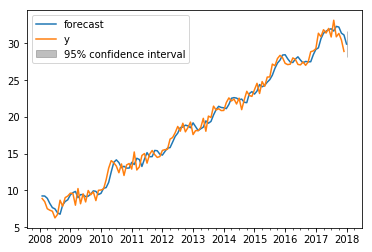

In [380]:
arima_model = ARIMA(time_series, order=(1,1,1)).fit()
forecast = arima_model.forecast()[0]
actual = time_series[n-12:n]
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
arima_model.plot_predict(1,n); plt.show()

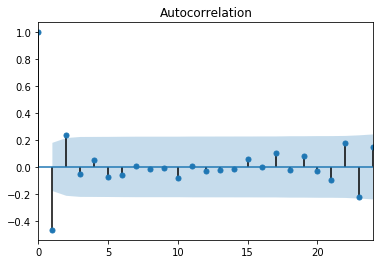

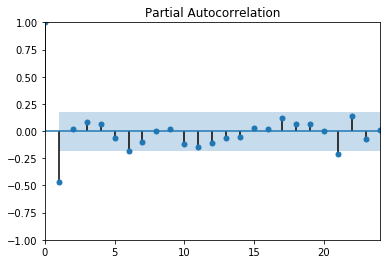

In [381]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series.diff().bfill()); plt.xlim(0,24); plt.show()
plot_pacf(time_series.diff().bfill()); plt.xlim(0,24); plt.ylim(-1,1);plt.show()

<center> Determining orders of AR and MA from ACF and PACF <br>
 <br>
<center> <a href="https://people.duke.edu/~rnau/411arim3.htm"> https://people.duke.edu/~rnau/411arim3.htm </a>

AIC: 319.4596326357567
BIC: 333.35525010131437


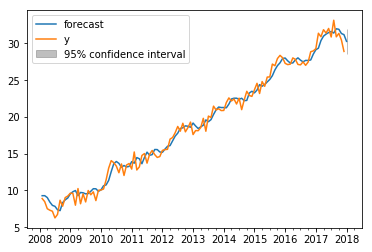

In [382]:
arima_model = ARIMA(time_series, order=(2,1,1)).fit()
forecast = arima_model.forecast()[0]
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
arima_model.plot_predict(1,n); plt.show()

## <center> Seasonal ARIMA (SARIMA)

<center> Adds a seasonal component with its own set of parameters.

<center> SARIMA (p,d,q) (P,D,Q,m)

In [110]:
n = 12*10
mu = 8
phi = 0.12
phi_2 = 0.08
theta = 2
noise_weight = 1.5
errors = noise_weight*np.random.normal(size=n)
values = np.ones(n)
data = []
date_vals = pd.date_range(start='1/1/2008', periods=n, freq='M')
for i,x in enumerate(values):
    data.append(3*date_vals[i].month + mu + phi*(data[i-1]-mu) + phi_2*(data[i-2]-mu) + errors[i] + theta*errors[i-1] + 0.05*i  if i>2 else mu + phi + phi_2 + errors[i])
time_series =  pd.Series(data, index=date_vals)
time_series.index = pd.DatetimeIndex(time_series.index)

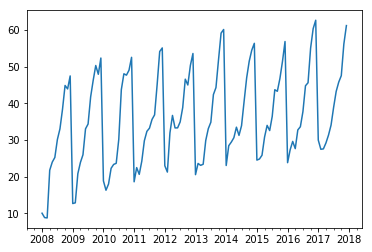

In [111]:
time_series.plot()

AIC: 798.9761122960624
BIC: 809.7046372045593
Forecast MSE: 218.4716999336874


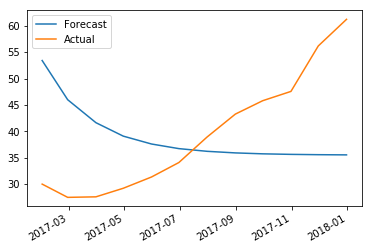

In [112]:
arima_model = ARIMA(time_series[0:-12], order=(1,0,1)).fit()
forecast = arima_model.forecast(steps=12)[0]
actual = time_series[n-12:n]
print('AIC:',arima_model.aic)
print('BIC:', arima_model.bic)
print('Forecast MSE:', mean_squared_error(actual, forecast))
plt.plot(date_vals[n-12:n],forecast)
actual.plot(); plt.legend(['Forecast','Actual'])

In [113]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(time_series[0:-12], order=(1,1,1), seasonal_order=(1,0,0,12)).fit()
forecast = sarima.forecast(steps=12)
actual = time_series[n-12:n]
print('AIC:',sarima.aic)
print('BIC:', sarima.bic)
print('Forecast MSE:', mean_squared_error(actual, forecast))
forecast.plot();actual.plot();plt.legend(['Forecast','Actual'])

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.

## <center> Activity

<center>Using the data found in <i>price_data.csv</i> fit an appropriate time series model.<br><br>
Train the model on the first 4 years of data and test the model on the most recent year.